### 🖥️분류 (Classification) 프로젝트 3
#### 🚬흡연 여부 예측

#### ✏️feature

- sex: 성별
- age: 5의 배수로 반올림한 나이
- height: 5의 배수로 반올림한 키
- weight: 체중
- sight_left: 시력(좌)
- sight_right: 시력(우)
- hear_left: 청력(좌)
- hear_right: 청력(우)
- SBP: Systolic blood pressure[mmHg], 수축기 혈압
- DBP: Diastolic blood pressure[mmHg], 이완기 혈압
- BLDS: BLDS or FSG(fasting blood glucose)[mg/dL], 공복혈당
- tot_chole: total cholesterol[mg/dL], 총 콜레스테롤
- HDL_chole: HDL 콜레스테롤
- LDL_chole: LDL 콜레스테롤
- triglyceride: 중성지방
- hemoglobin: 헤모글로빈
- urine_protein: 요단백 또는 단백뇨, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
- serum_creatinine: 혈청 크레아티닌
- SGOT_AST: SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L], 혈청지오티 AST
- SGOT_ALT: ALT(Alanine transaminase)[IU/L], 혈청지오티 ALT
- gamma_GTP: y-glutamyl transpeptidase[IU/L], 감마지티피
- DRK_YN: 음주여부

#### 🎈target

- SMK_stat_type_cd: 흡연상태 (1: 비흡연, 2: 금연, 3: 흡연)

### 목차

1. 데이터 탐색 및 분포 시각화
2. 데이터 전처리 및 훈련/학습 데이터 분리
3. 모델 훈련, 예측 및 평가
   - DTC
   - SVC
   - KNN
   - Ensemble(Hard/soft Voting[DTC, SVC, KNN], Bagging[RFC], Boosting[AdaBoost, GBM, XGB, LightGBM])
4. 정확도 및 F1 score 비교 분석

#### 1. 데이터 탐색 및 분포 시각화

- 중복행, 결측치 검사
- 분포 시각화, 상관관계 확인 및 이상치 검사

- 데이터를 읽어옵니다.

In [13]:
import pandas as pd

s_df = pd.read_csv('./datasets/smoke_dataset.csv', low_memory=False)
s_df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


- 데이터의 정보를 확인해봅니다.

In [14]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

- 중복행을 검사합니다.

In [15]:
s_df.duplicated().sum()

26

- 중복행을 삭제합니다.

In [16]:
s_df.drop_duplicates(inplace=True)

In [17]:
s_df.duplicated().sum()

0

- 결측치를 검사합니다.

In [18]:
s_df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [19]:
s_df.reset_index(drop=True, inplace=True)
s_df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991315,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991316,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991317,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991318,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


- 히스토그램을 통해 각 feature별 분포를 확인해봅니다.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'waistline'}>,
        <Axes: title={'center': 'sight_left'}>],
       [<Axes: title={'center': 'sight_right'}>,
        <Axes: title={'center': 'hear_left'}>,
        <Axes: title={'center': 'hear_right'}>,
        <Axes: title={'center': 'SBP'}>, <Axes: title={'center': 'DBP'}>],
       [<Axes: title={'center': 'BLDS'}>,
        <Axes: title={'center': 'tot_chole'}>,
        <Axes: title={'center': 'HDL_chole'}>,
        <Axes: title={'center': 'LDL_chole'}>,
        <Axes: title={'center': 'triglyceride'}>],
       [<Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'urine_protein'}>,
        <Axes: title={'center': 'serum_creatinine'}>,
        <Axes: title={'center': 'SGOT_AST'}>,
        <Axes: title={'center': 'SGOT_ALT'}>],
       [<Axes: title={'center': 'gamma_GTP'}>,
        <Axes: title={'center

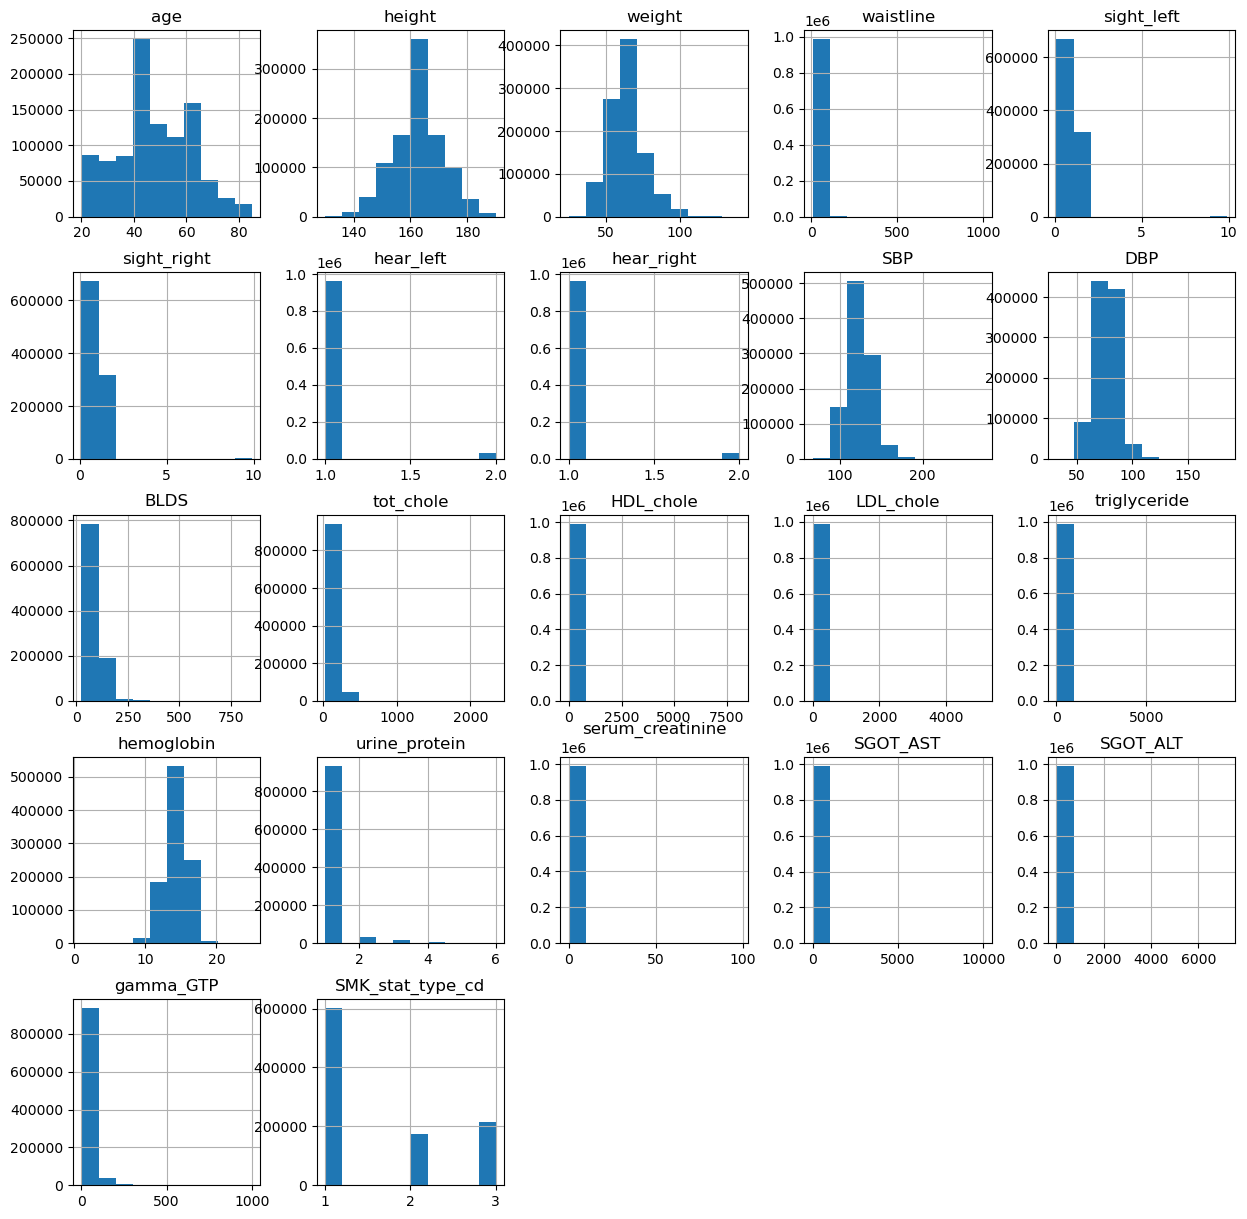

In [20]:
s_df.hist(figsize=(15, 15))

- 성별 feature의 분포를 pie그래프로 시각화합니다.

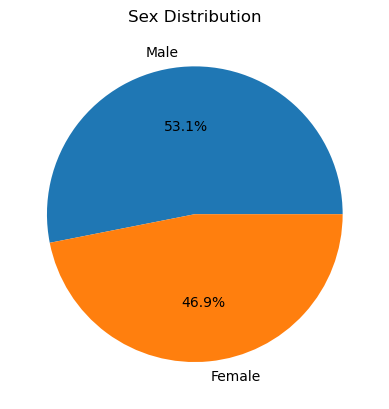

In [21]:
import matplotlib.pyplot as plt

value_dict = dict(s_df['sex'].value_counts())
plt.pie(value_dict.values(), labels=value_dict.keys(), autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

- 수치형 데이터에 대해 상관관계를 확인해봅니다.

In [22]:
corr_s_df = s_df.drop(labels=['sex', 'DRK_YN'], axis=1)
corr = corr_s_df.corr()
corr

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
age,1.000000,-0.398501,-0.195333,0.127175,-0.172098,-0.167682,0.203023,0.198698,0.265532,0.108845,...,-0.104630,0.029487,0.043553,-0.173090,0.041489,0.022821,0.059405,-0.020508,0.017394,-0.126028
height,-0.398501,1.000000,0.668823,0.263937,0.139142,0.138527,-0.081159,-0.082469,0.035025,0.108779,...,-0.148592,-0.015444,0.137611,0.531904,0.002290,0.171254,0.039206,0.144844,0.162337,0.467306
weight,-0.195333,0.668823,1.000000,0.637164,0.088908,0.088711,-0.044497,-0.045723,0.250765,0.277890,...,-0.287682,0.067856,0.283774,0.499496,0.029273,0.153883,0.099659,0.276445,0.221880,0.366488
waistline,0.127175,0.263937,0.637164,1.000000,0.004516,0.006160,0.033226,0.031004,0.272317,0.240887,...,-0.253983,0.063413,0.249436,0.291724,0.043131,0.098420,0.096863,0.212267,0.186988,0.205474
sight_left,-0.172098,0.139142,0.088908,0.004516,1.000000,0.307981,-0.039428,-0.041003,-0.035620,-0.001213,...,-0.004227,0.003016,0.010598,0.085901,-0.010256,0.020309,-0.005427,0.018816,0.013563,0.064196
sight_right,-0.167682,0.138527,0.088711,0.006160,0.307981,1.000000,-0.040764,-0.038901,-0.033996,-0.000572,...,-0.006258,0.002157,0.012262,0.086849,-0.010900,0.021447,-0.004600,0.018920,0.016493,0.065050
hear_left,0.203023,-0.081159,-0.044497,0.033226,-0.039428,-0.040764,1.000000,0.536899,0.056068,0.006895,...,-0.029467,-0.014619,0.002098,-0.036057,0.019756,0.015254,0.011282,-0.007908,0.002992,-0.021244
hear_right,0.198698,-0.082469,-0.045723,0.031004,-0.041003,-0.038901,0.536899,1.000000,0.057417,0.007505,...,-0.028044,-0.013438,0.002160,-0.036706,0.018240,0.012959,0.010764,-0.008688,0.003546,-0.022339
SBP,0.265532,0.035025,0.250765,0.272317,-0.035620,-0.033996,0.056068,0.057417,1.000000,0.741126,...,-0.111767,0.033613,0.185993,0.166524,0.063507,0.062608,0.081481,0.117615,0.161426,0.084907
DBP,0.108845,0.108779,0.277890,0.240887,-0.001213,-0.000572,0.006895,0.007505,0.741126,1.000000,...,-0.093835,0.066978,0.198647,0.241976,0.046043,0.057056,0.078558,0.131321,0.175613,0.126846


- target(SMK_stat_type_cd)과의 상관관계를 확인해봅니다.

In [23]:
corr['SMK_stat_type_cd'].sort_values(ascending=False)[1:]

height              0.467306
hemoglobin          0.453380
weight              0.366488
gamma_GTP           0.243572
triglyceride        0.216019
waistline           0.205474
SGOT_ALT            0.131570
serum_creatinine    0.129676
DBP                 0.126846
BLDS                0.086478
SBP                 0.084907
sight_right         0.065050
sight_left          0.064196
SGOT_AST            0.062441
urine_protein       0.015259
tot_chole           0.011838
LDL_chole          -0.012312
hear_left          -0.021244
hear_right         -0.022339
age                -0.126028
HDL_chole          -0.161022
Name: SMK_stat_type_cd, dtype: float64

- target(종속 변수)을 제외한 feature(독립 변수)들 사이의 상관관계 또한 시각화해봅니다.

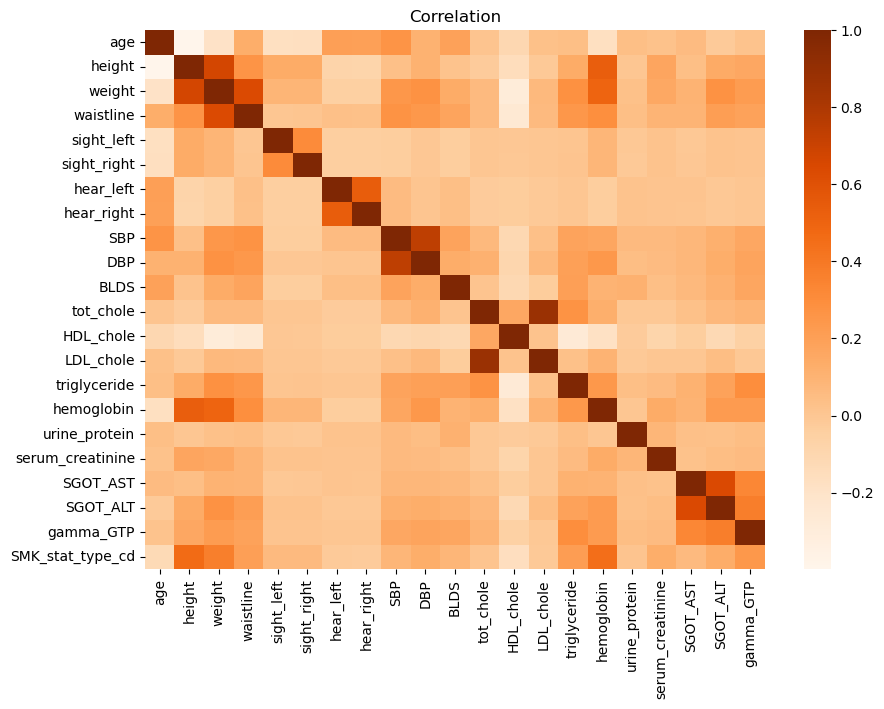

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_corr = corr.iloc[:, :-1]

fig = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(feature_corr, cmap='Oranges')
heatmap.set_title('Correlation')
plt.show()

#### 2. 데이터 전처리 및 훈련/학습 데이터 분리

- 가독성을 위해 target의 이름을 변경하고 가장 마지막 순서로 위치를 변경합니다.
- 성별 feature 및 target에 대해 LabelEncoder를 통해 레이블 인코딩을 적용합니다.
- 분포가 지나치게 치우친 feature의 value_counts() 및 describe()를 확인한 후 필요 시 StandardScaler()로 표준화하여 이상치를 제거합니다.
- train_test_split()을 통해 훈련 및 학습 데이터를 분리합니다.
- 훈련 데이터를 target인 흡연 상태에 대해 비중이 가장 높은 1을 기준으로 SMOTE를 통해 oversampling을 진행합니다.

In [25]:
s_df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991315,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991316,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991317,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991318,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


- 전처리를 진행하기 전 원본 데이터 프레임을 복사하여 저장 후 사용합니다.

In [26]:
pre_s_df = s_df.copy()

- target의 이름을 변경하고 가장 마지막 순서로 위치를 변경합니다.

In [27]:
pre_s_df = s_df.rename(columns={'SMK_stat_type_cd': 'target'})
target = pre_s_df['target']
pre_s_df.drop(labels=['target'], axis=1, inplace=True)
pre_s_df['target'] = target
pre_s_df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN,target
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,Y,1.0
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,N,3.0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,N,1.0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,N,1.0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,N,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991315,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,N,1.0
991316,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,N,1.0
991317,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,Y,3.0
991318,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,N,1.0


- 분포를 확인할 필요가 있는 feature은 아래와 같습니다.  
  \['waistline', 'sight_left', 'sight_right', 'BLDS', 'hear_left', 'hear_right',  
            'tot_chole', 'HDL_chole', 'LDL_chole',   
            'triglyceride', 'serum_creatinine',   
            'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'\]

In [28]:
pre_s_df['waistline'].value_counts()

waistline
80.0     37790
81.0     34603
82.0     34022
84.0     33912
86.0     32722
         ...  
115.9        1
52.6         1
43.0         1
133.0        1
51.2         1
Name: count, Length: 737, dtype: int64

In [29]:
pre_s_df[['waistline']].describe().T

,count,mean,std,min,25%,50%,75%,max
waistline,991320.0,81.233255,11.850296,8.0,74.1,81.0,87.8,999.0


- max값이 너무 크기 때문에 StandardScaler()를 통해 이상치를 제거하기로 합니다.
- 그 전에, 다른 feature들에 대해서도 함께 확인해봅니다.

In [30]:
pre_s_df[['waistline', 'sight_left', 'sight_right', 'BLDS', 'hear_left', 'hear_right',
           'tot_chole', 'HDL_chole', 'LDL_chole', 
           'triglyceride', 'serum_creatinine', 
           'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']].describe().T

,count,mean,std,min,25%,50%,75%,max
waistline,991320.0,81.233255,11.850296,8.0,74.1,81.0,87.8,999.0
sight_left,991320.0,0.980833,0.605954,0.1,0.7,1.0,1.2,9.9
sight_right,991320.0,0.978428,0.604779,0.1,0.7,1.0,1.2,9.9
BLDS,991320.0,100.424305,24.179852,25.0,88.0,96.0,105.0,852.0
hear_left,991320.0,1.031495,0.174652,1.0,1.0,1.0,1.0,2.0
hear_right,991320.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
tot_chole,991320.0,195.556769,38.660092,30.0,169.0,193.0,219.0,2344.0
HDL_chole,991320.0,56.936984,17.238578,1.0,46.0,55.0,66.0,8110.0
LDL_chole,991320.0,113.037429,35.842938,1.0,89.0,111.0,135.0,5119.0
triglyceride,991320.0,132.140030,102.194762,1.0,73.0,106.0,159.0,9490.0


- 대체로 max값이 평균이나 4분위 분포표의 25%/50%/75% 값들보다 너무 큰 사실을 발견할 수 있습니다.
- 따라서 전체 feature에 StandardScaler()를 적용하여 이상치를 제거할 필요가 있습니다.
- 다만, hear_left 및 hear_right의 value_counts()를 확인할 필요가 있다고 판단됩니다.

In [31]:
display(pre_s_df['hear_left'].value_counts())
display(pre_s_df['hear_right'].value_counts())

hear_left
1.0    960098
2.0     31222
Name: count, dtype: int64

hear_right
1.0    961109
2.0     30211
Name: count, dtype: int64

- 비중의 차이가 너무 크기 때문에 undersampling을 진행하기에는 무리가 있다고 판단하여, 이상치로 간주하고 제거하기로 합니다.

In [32]:
pre_s_df = pre_s_df[~(pre_s_df['hear_left'] == 2.0)]
pre_s_df = pre_s_df[~(pre_s_df['hear_right'] == 2.0)]

In [33]:
display(pre_s_df['hear_left'].value_counts())
display(pre_s_df['hear_right'].value_counts())

hear_left
1.0    946817
Name: count, dtype: int64

hear_right
1.0    946817
Name: count, dtype: int64

- 나머지 모든 feature들에 대해 StandardScaler를 통해 표준화를 진행하기에 앞서, LabelEncoder()를 통해 성별 feature에 레이블 인코딩을 진행합니다.

In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
pre_s_df['sex'] = encoder.fit_transform(pre_s_df['sex'].tolist())
print(f'성별: {encoder.classes_}')

성별: ['Female' 'Male']


- 또한 음주 여부(DRK_YN) feature에 대해 레이블 인코딩을 진행합니다.

In [35]:
drink_encoder = LabelEncoder()
pre_s_df['DRK_YN'] = drink_encoder.fit_transform(pre_s_df['DRK_YN'].tolist())
print(f'음주 여부: {drink_encoder.classes_}')

음주 여부: ['N' 'Y']


- 모든 feature에 대해 표준화 진행 및 이상치 제거를 수행합니다.

In [36]:
pre_s_df.reset_index(drop=True, inplace=True)
pre_s_df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN,target
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1,1.0
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,0,3.0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,0,1.0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0,1.0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946812,1,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,0,1.0
946813,1,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,0,1.0
946814,0,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,1,3.0
946815,1,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,0,1.0


In [37]:
from sklearn.preprocessing import StandardScaler

features = pre_s_df.iloc[:, :-1]

std = StandardScaler()
std_features = std.fit_transform(features)
std_s_df = pd.DataFrame(std_features, columns=features.columns)
std_s_df['target'] = pre_s_df['target']
std_s_df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN,target
0,0.939766,-0.858695,0.819896,0.921840,0.740506,0.022423,0.026775,0.0,0.0,-0.153959,...,0.359742,-0.390222,1.801992,-0.213675,0.291310,-0.208085,0.349761,0.057998,0.986039,1.0
1,0.939766,-1.219295,1.903049,1.319942,0.656947,-0.149160,0.370644,0.0,0.0,0.536980,...,0.975639,-0.107881,0.981822,-0.213675,0.084845,-0.250366,0.387791,-0.201485,-1.014159,3.0
2,0.939766,-0.498096,0.278320,0.921840,0.824064,0.365590,0.886446,0.0,0.0,-0.153959,...,-1.096014,-0.273391,0.981822,-0.213675,0.084845,0.891211,0.235670,0.616884,-1.014159,1.0
3,0.939766,0.223104,1.361473,1.319942,0.824064,0.880340,0.370644,0.0,0.0,1.573388,...,-0.256155,-0.253920,2.117443,-0.213675,0.497776,0.130160,0.311731,-0.381127,-1.014159,1.0
4,0.939766,0.223104,0.278320,-0.272467,-0.095079,0.022423,0.370644,0.0,0.0,1.089730,...,0.107784,-0.273391,-0.279978,-0.213675,-0.121620,-0.292646,-0.524934,-0.241406,-1.014159,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946812,0.939766,-0.137496,1.361473,1.319942,0.915979,0.880340,0.886446,0.0,0.0,-0.568522,...,0.331747,-0.000786,0.477102,-0.213675,0.291310,0.003318,0.387791,-0.201485,-1.014159,1.0
946813,0.939766,-0.858695,0.819896,0.921840,0.406272,0.022423,0.886446,0.0,0.0,-0.223053,...,-0.816061,-0.847809,0.981822,-0.213675,0.497776,-0.504049,-0.334783,-0.441008,-1.014159,1.0
946814,-1.064095,-0.498096,-0.804833,-1.068672,-1.097780,0.022423,-0.489028,0.0,0.0,-0.844898,...,-1.012028,0.242611,0.035472,-0.213675,-0.121620,0.172440,0.045519,-0.401087,0.986039,3.0
946815,0.939766,-1.579895,1.361473,-0.272467,-0.763546,0.880340,0.026775,0.0,0.0,-0.223053,...,-1.124009,-0.769922,0.161652,-0.213675,-0.121620,-0.208085,-0.448873,-0.401087,-1.014159,1.0


In [38]:
std_s_df['target'].isna().sum()

0

- target을 제외한 feature들에 대하여 이상치를 제거합니다.

In [39]:
for feature in std_s_df.iloc[:, :-1].columns:
    print(f'{feature}: {std_s_df[~std_s_df[feature].between(-1.96, 1.96)].shape[0]}건')

sex: 0건
age: 33510건
height: 15455건
weight: 38479건
waistline: 11531건
sight_left: 2680건
sight_right: 2676건
hear_left: 0건
hear_right: 0건
SBP: 42897건
DBP: 42343건
BLDS: 33174건
tot_chole: 42952건
HDL_chole: 23569건
LDL_chole: 38199건
triglyceride: 33653건
hemoglobin: 38905건
urine_protein: 52895건
serum_creatinine: 2078건
SGOT_AST: 12165건
SGOT_ALT: 23390건
gamma_GTP: 28935건
DRK_YN: 0건


In [40]:
for feature in std_s_df.iloc[:, :-1].columns:
    std_s_df.drop(std_s_df[~std_s_df[feature].between(-1.96, 1.96)].index, axis=0, inplace=True)

In [41]:
for feature in std_s_df.iloc[:, :-1].columns:
    print(f'{feature}: {std_s_df[~std_s_df[feature].between(-1.96, 1.96)].shape[0]}건')

sex: 0건
age: 0건
height: 0건
weight: 0건
waistline: 0건
sight_left: 0건
sight_right: 0건
hear_left: 0건
hear_right: 0건
SBP: 0건
DBP: 0건
BLDS: 0건
tot_chole: 0건
HDL_chole: 0건
LDL_chole: 0건
triglyceride: 0건
hemoglobin: 0건
urine_protein: 0건
serum_creatinine: 0건
SGOT_AST: 0건
SGOT_ALT: 0건
gamma_GTP: 0건
DRK_YN: 0건


In [42]:
std_s_df.reset_index(drop=True, inplace=True)
std_s_df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN,target
0,0.939766,-0.858695,0.819896,0.921840,0.740506,0.022423,0.026775,0.0,0.0,-0.153959,...,0.359742,-0.390222,1.801992,-0.213675,0.291310,-0.208085,0.349761,0.057998,0.986039,1.0
1,0.939766,-1.219295,1.903049,1.319942,0.656947,-0.149160,0.370644,0.0,0.0,0.536980,...,0.975639,-0.107881,0.981822,-0.213675,0.084845,-0.250366,0.387791,-0.201485,-1.014159,3.0
2,0.939766,-0.498096,0.278320,0.921840,0.824064,0.365590,0.886446,0.0,0.0,-0.153959,...,-1.096014,-0.273391,0.981822,-0.213675,0.084845,0.891211,0.235670,0.616884,-1.014159,1.0
3,0.939766,0.223104,0.278320,-0.272467,-0.095079,0.022423,0.370644,0.0,0.0,1.089730,...,0.107784,-0.273391,-0.279978,-0.213675,-0.121620,-0.292646,-0.524934,-0.241406,-1.014159,1.0
4,-1.064095,-0.137496,-1.346409,-0.670570,-1.014222,-0.835494,-1.004831,0.0,0.0,-1.466742,...,0.051794,-0.555732,-1.226329,-0.213675,-0.121620,-0.292646,-0.524934,-0.500888,-1.014159,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615169,-1.064095,0.223104,-1.346409,-1.068672,-0.713411,0.022423,0.026775,0.0,0.0,-0.430334,...,-0.228159,-0.068938,0.603282,-0.213675,-0.121620,0.087879,0.007489,-0.161565,-1.014159,1.0
615170,0.939766,-0.137496,1.361473,1.319942,0.915979,0.880340,0.886446,0.0,0.0,-0.568522,...,0.331747,-0.000786,0.477102,-0.213675,0.291310,0.003318,0.387791,-0.201485,-1.014159,1.0
615171,0.939766,-0.858695,0.819896,0.921840,0.406272,0.022423,0.886446,0.0,0.0,-0.223053,...,-0.816061,-0.847809,0.981822,-0.213675,0.497776,-0.504049,-0.334783,-0.441008,-1.014159,1.0
615172,0.939766,-1.579895,1.361473,-0.272467,-0.763546,0.880340,0.026775,0.0,0.0,-0.223053,...,-1.124009,-0.769922,0.161652,-0.213675,-0.121620,-0.208085,-0.448873,-0.401087,-1.014159,1.0


array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'waistline'}>],
       [<Axes: title={'center': 'sight_left'}>,
        <Axes: title={'center': 'sight_right'}>,
        <Axes: title={'center': 'hear_left'}>,
        <Axes: title={'center': 'hear_right'}>,
        <Axes: title={'center': 'SBP'}>],
       [<Axes: title={'center': 'DBP'}>,
        <Axes: title={'center': 'BLDS'}>,
        <Axes: title={'center': 'tot_chole'}>,
        <Axes: title={'center': 'HDL_chole'}>,
        <Axes: title={'center': 'LDL_chole'}>],
       [<Axes: title={'center': 'triglyceride'}>,
        <Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'urine_protein'}>,
        <Axes: title={'center': 'serum_creatinine'}>,
        <Axes: title={'center': 'SGOT_AST'}>],
       [<Axes: title={'center': 'SGOT_ALT'}>,
        <Axes: title={'center': 'ga

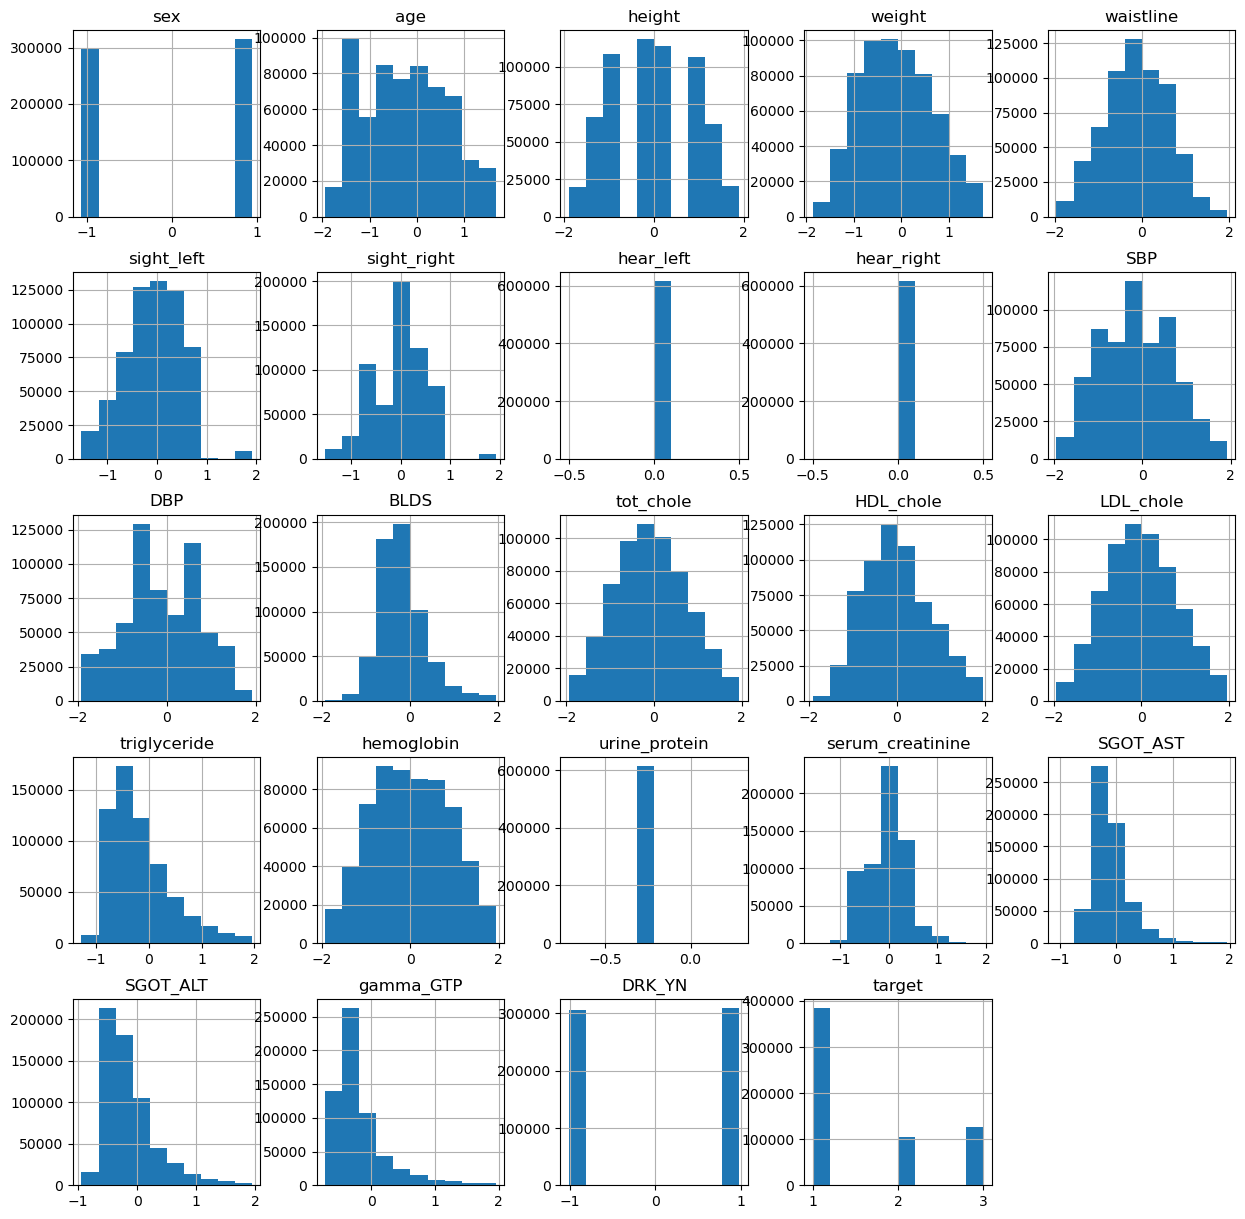

In [43]:
# 히스토그램으로 다시 분포를 확인해봅니다.
std_s_df.hist(figsize=(15, 15))

In [44]:
std_s_df['target'].value_counts()

target
1.0    384937
3.0    126105
2.0    104132
Name: count, dtype: int64

In [45]:
std_s_df['target'].isna().sum()

0

- target 데이터에 대해 int8 타입으로 변환합니다.

In [46]:
import numpy as np

std_s_df['target'] = std_s_df['target'].astype(np.int8)
std_s_df['target'].value_counts()

target
1    384937
3    126105
2    104132
Name: count, dtype: int64

- target에 대해 레이블 인코딩을 진행합니다.

In [47]:
target_encoder = LabelEncoder()
std_s_df['target'] = target_encoder.fit_transform(std_s_df['target'].tolist())
print(f'흡연 상태: {target_encoder.classes_}')

흡연 상태: [1 2 3]


In [48]:
std_s_df['target'].value_counts()

target
0    384937
2    126105
1    104132
Name: count, dtype: int64

- train_test_split()을 통해 훈련 및 학습 데이터를 분리합니다.
- SMOTE를 통해 타겟 데이터의 비중을 oversampling하여 맞춰줍니다.

In [49]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = std_s_df.iloc[:, :-1], std_s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [50]:
y_train_over.value_counts()

target
1    307949
2    307949
0    307949
Name: count, dtype: int64

---
#### 3. 모델 훈련, 예측 및 평가
- DTC  
- SVC  
- KNN  
- Ensemble(Hard/soft Voting[DTC, SVC, KNN], Bagging[RFC], Boosting[AdaBoost, GBM, XGB, LightGBM])
- 각각 GridSearchCV를 통해 최적의 하이퍼 파라미터 탐색을 동시에 진행합니다.

##### 1) DTC(Decision Tree Classifier) 분류 모델

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

parameters = {
    'max_depth': [5, 6, 7],
    'min_samples_split': [7, 8, 9]
}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [7, 8, 9]},
             return_train_score=True)

In [39]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 7}",0.630660,7
1,"{'max_depth': 5, 'min_samples_split': 8}",0.630660,7
2,"{'max_depth': 5, 'min_samples_split': 9}",0.630660,7
3,"{'max_depth': 6, 'min_samples_split': 7}",0.636032,4
4,"{'max_depth': 6, 'min_samples_split': 8}",0.636032,4
5,"{'max_depth': 6, 'min_samples_split': 9}",0.636032,4
6,"{'max_depth': 7, 'min_samples_split': 7}",0.638584,1
7,"{'max_depth': 7, 'min_samples_split': 8}",0.638583,2
8,"{'max_depth': 7, 'min_samples_split': 9}",0.638583,2


- max_depth와 min_samples_split이 커질 수록 정확도가 상승하므로 좀 더 큰 값으로 훈련시켜보기로 합니다.

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

parameters = {
    'max_depth': [10, 11, 12],
    'min_samples_split': [10, 11, 12]
}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_split': [10, 11, 12]},
             return_train_score=True)

In [41]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 10}",0.646703,8
1,"{'max_depth': 10, 'min_samples_split': 11}",0.646707,7
2,"{'max_depth': 10, 'min_samples_split': 12}",0.646697,9
3,"{'max_depth': 11, 'min_samples_split': 10}",0.648336,6
4,"{'max_depth': 11, 'min_samples_split': 11}",0.648337,5
5,"{'max_depth': 11, 'min_samples_split': 12}",0.648349,4
6,"{'max_depth': 12, 'min_samples_split': 10}",0.652424,1
7,"{'max_depth': 12, 'min_samples_split': 11}",0.652378,3
8,"{'max_depth': 12, 'min_samples_split': 12}",0.652389,2


- max_depth=12, min_samples_split=11 으로 훈련시켰을 때의 정확도가 가장 높았음을 알 수 있습니다.

In [42]:
dtc = g_dtc.best_estimator_

- feature 별 중요도를 시각화합니다.


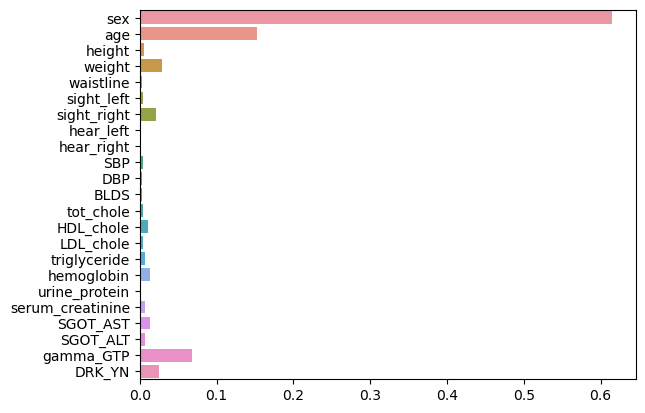

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

- 결정 경계를 시각화합니다.

In [44]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


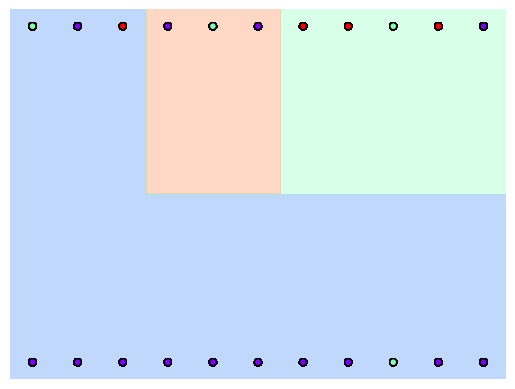

In [45]:
from copy import deepcopy

copy_dtc = deepcopy(dtc)
visualize_boundary(copy_dtc, features.iloc[:, [1, 0]], targets)

- 오차 행렬을 시각화해봅니다.

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [47]:
dtc_prediction = dtc.predict(X_test)

오차 행렬
[[59781  9035  8172]
 [ 2551 11602  6673]
 [ 3783  7921 13517]]
정확도: 0.6900, 정밀도: 0.5957, 재현율: 0.6232, F1: 0.6033
################################################################################


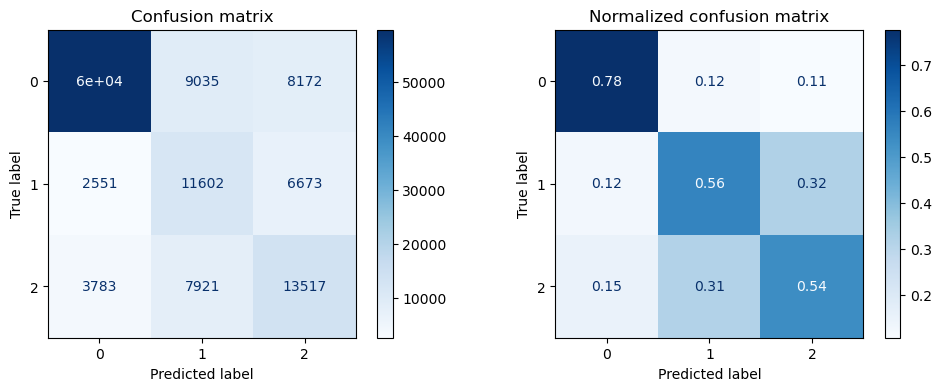

In [48]:
get_evaluation(y_test, dtc_prediction, dtc, X_test)

##### 2) SVC(Support Vector machine Classifier) 분류 모델
- 앞서 StandardScaler을 통해 스케일링을 진행하였으므로, 따로 파이프라인을 구축할 필요는 없다고 판단됩니다.

- 다만, 데이터의 수가 많아 LinearSVC를 통해 linear kernel로 학습시킨 후 오차행렬을 구해봅니다.

In [49]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# svc_parameters = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf'] 
# }

# svc = SVC(probability=True, verbose=True)

# g_svc = GridSearchCV(svc, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
# g_svc.fit(X_train_over, y_train_over)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

l_svc_parameters = {
    'C': [0.001, 0.01, 0.1]
}

l_svc = LinearSVC(verbose=True)

g_l_svc = GridSearchCV(l_svc, param_grid=l_svc_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_l_svc.fit(X_train_over, y_train_over)

[LibLinear]

GridSearchCV(cv=3, estimator=LinearSVC(verbose=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1]}, return_train_score=True)

In [51]:
l_svc_result_df = pd.DataFrame(g_l_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(l_svc_result_df)

,params,mean_test_score,rank_test_score
0,{'C': 0.001},0.645387,3
1,{'C': 0.01},0.645461,1
2,{'C': 0.1},0.645455,2


- 📌C가 0.01일 때 점수가 미세하지만 가장 높고, 0.1로 커졌을 때 오히려 감소하는 양상을 띤다는 사실을 확인할 수 있습니다.
- 따라서 best_estimator_로 이후 과정을 진행합니다.

In [52]:
svc = g_l_svc.best_estimator_
svc_prediction = svc.predict(X_test)

- 오차행렬을 시각화해봅니다.

오차 행렬
[[56583 10286 10119]
 [ 1374 12618  6834]
 [ 2074  8300 14847]]
정확도: 0.6831, 정밀도: 0.6046, 재현율: 0.6432, F1: 0.6106
################################################################################


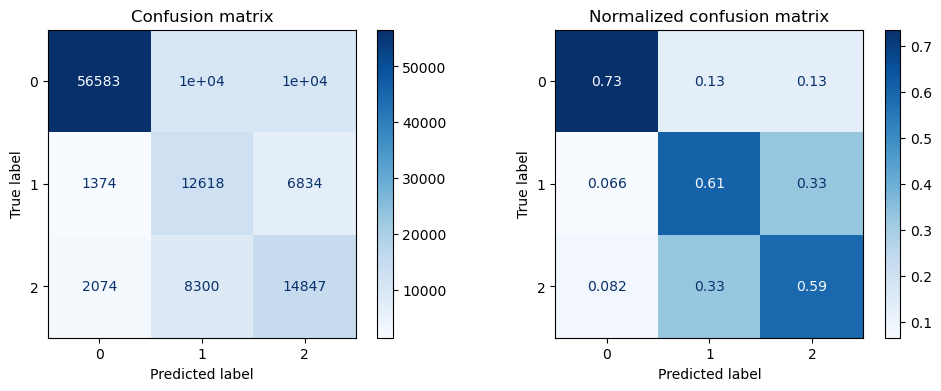

In [53]:
get_evaluation(y_test, svc_prediction, svc, X_test)

##### 3) KNN(K-Nearest Neighbors) 분류 모델

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': [3, 5, 7]
}

g_knn = GridSearchCV(knn, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7]}, return_train_score=True)

In [55]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 3},0.872790,1
1,{'n_neighbors': 5},0.848605,2
2,{'n_neighbors': 7},0.828856,3


In [56]:
knn = g_knn.best_estimator_
knn_prediction = knn.predict(X_test)

- 오차행렬을 시각화해봅니다.

오차 행렬
[[54173 11293 11522]
 [ 3659  9470  7697]
 [ 4600  8834 11787]]
정확도: 0.6131, 정밀도: 0.5226, 재현율: 0.5419, F1: 0.5240
################################################################################


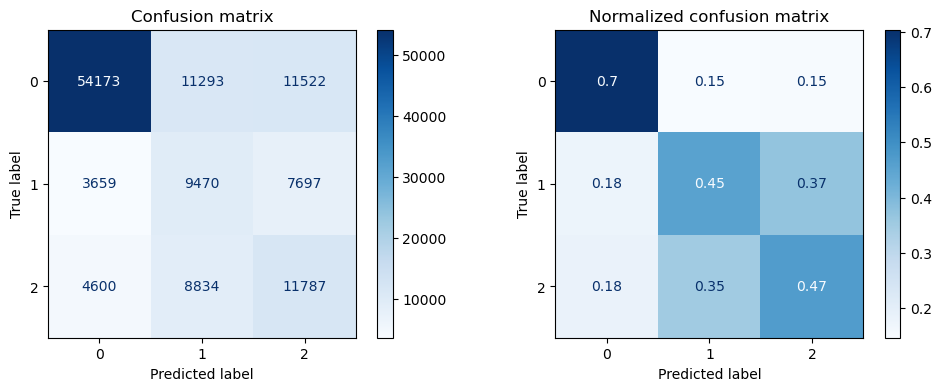

In [57]:
get_evaluation(y_test, knn_prediction, knn, X_test)

##### 4) Ensemble - RandomForestClassifier(Bagging)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    'max_depth': [10, 11, 12],
    'min_samples_split': [10, 11, 12]
}

rfc = RandomForestClassifier(n_estimators=50)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=50), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_split': [10, 11, 12]},
             return_train_score=True)

In [59]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 10}",0.650142,9
1,"{'max_depth': 10, 'min_samples_split': 11}",0.650825,7
2,"{'max_depth': 10, 'min_samples_split': 12}",0.650721,8
3,"{'max_depth': 11, 'min_samples_split': 10}",0.655711,4
4,"{'max_depth': 11, 'min_samples_split': 11}",0.655084,6
5,"{'max_depth': 11, 'min_samples_split': 12}",0.655615,5
6,"{'max_depth': 12, 'min_samples_split': 10}",0.662563,2
7,"{'max_depth': 12, 'min_samples_split': 11}",0.662378,3
8,"{'max_depth': 12, 'min_samples_split': 12}",0.662714,1


In [60]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

- 오차행렬을 시각화해봅니다.

오차 행렬
[[57161  8780 11047]
 [ 1479 11362  7985]
 [ 2236  6771 16214]]
정확도: 0.6887, 정밀도: 0.6071, 재현율: 0.6436, F1: 0.6138
################################################################################


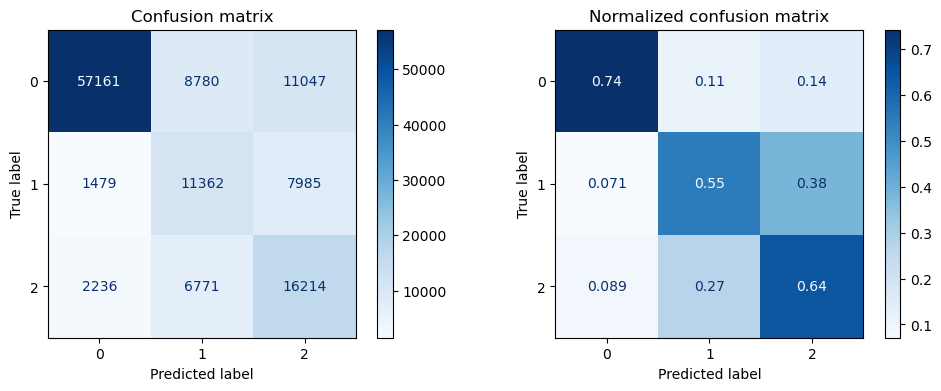

In [61]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

##### 5) Ensemble - VotingClassifier(Voting)
- (1) Hard Voting

In [107]:
from sklearn.ensemble import VotingClassifier

hard_vc = VotingClassifier(estimators=[
    ('dtc', dtc), ('svc', svc), ('knn', knn)
], voting='hard', n_jobs=-1)

hard_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=12,
                                                     min_samples_split=10)),
                             ('svc', LinearSVC(C=0.01, verbose=True)),
                             ('knn', KNeighborsClassifier(n_neighbors=3))],
                 n_jobs=-1)

In [108]:
hard_vc_prediction = hard_vc.predict(X_test)

- 오차행렬을 시각화해봅니다.

오차 행렬
[[58575  9038  9375]
 [ 2365 11457  7004]
 [ 3282  7244 14695]]
정확도: 0.6886, 정밀도: 0.5993, 재현율: 0.6312, F1: 0.6078
################################################################################


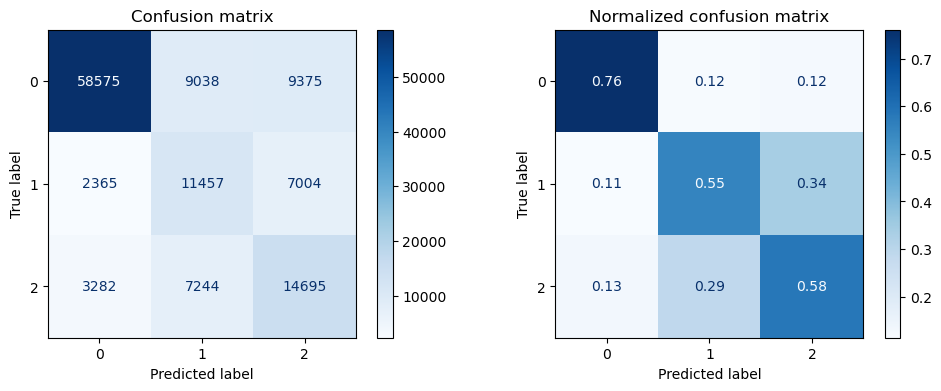

In [109]:
get_evaluation(y_test, hard_vc_prediction, hard_vc, X_test)

- (2) Soft Voting

- 앞서 사용한 LinearSVC에는 predict_proba가 없으므로, Soft Voting 시에는 CalibratedClassifierCV를 활용하여 확률을 보정합니다.

In [110]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

svc_calibrated = LinearSVC(C=0.1)
svc_calibrated.fit(X_train_over, y_train_over)
soft_svc = CalibratedClassifierCV(svc_calibrated, method='sigmoid')
soft_svc.fit(X_train_over, y_train_over)

CalibratedClassifierCV(estimator=LinearSVC(C=0.1))

In [111]:
from sklearn.ensemble import VotingClassifier

soft_vc = VotingClassifier(estimators=[
    ('dtc', dtc), ('soft_svc', soft_svc), ('knn', knn)
], voting='soft', n_jobs=-1)

soft_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=12,
                                                     min_samples_split=10)),
                             ('soft_svc',
                              CalibratedClassifierCV(estimator=LinearSVC(C=0.1))),
                             ('knn', KNeighborsClassifier(n_neighbors=3))],
                 n_jobs=-1, voting='soft')

In [112]:
soft_vc_prediction = soft_vc.predict(X_test)

- 오차행렬을 시각화해봅니다.

오차 행렬
[[57908  9540  9540]
 [ 1937 11224  7665]
 [ 2819  8614 13788]]
정확도: 0.6740, 정밀도: 0.5837, 재현율: 0.6126, F1: 0.5890
################################################################################


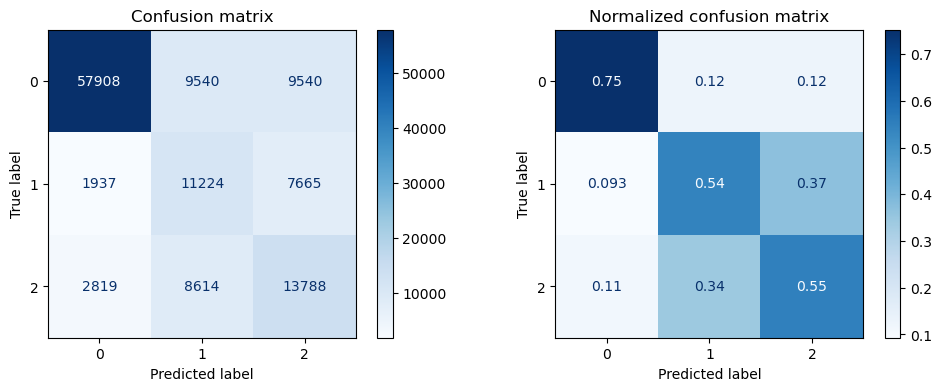

In [113]:
get_evaluation(y_test, soft_vc_prediction, soft_vc, X_test)

##### 6) Ensemble - AdaBoostClassifier(Boosting)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

ada_parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=ada_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [39]:
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(ada_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.635184,11
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.639461,8
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.641406,4
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.637813,9
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.640457,7
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.643068,3
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.635771,10
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.640616,6
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.646229,1
9,"{'learning_rate': 1, 'n_estimators': 50}",0.634770,12


In [40]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)

- 오차행렬을 시각화해봅니다.

오차 행렬
[[58338  9038  9612]
 [ 1945 11376  7505]
 [ 2745  7493 14983]]
정확도: 0.6884, 정밀도: 0.6000, 재현율: 0.6327, F1: 0.6077
################################################################################


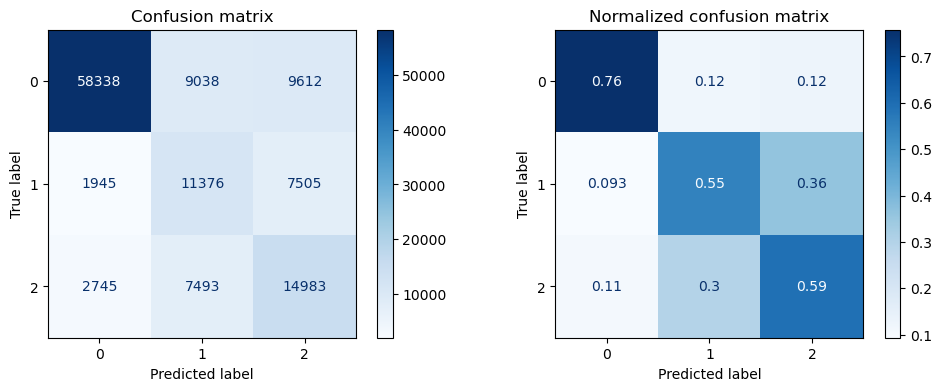

In [43]:
get_evaluation(y_test, ada_prediction, ada, X_test)

##### 7) Ensemble - GradientBoostingClassifier(Boosting)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbm_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=gbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [45]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbc_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.660174,1
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.656436,5
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.655964,6
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.658307,2
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.654425,8
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.657125,3
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.654199,9
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.654145,10
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.656453,4
9,"{'learning_rate': 1, 'n_estimators': 50}",0.652479,12


In [46]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

- 오차행렬을 시각화해봅니다.

오차 행렬
[[61330  7146  8512]
 [ 3309  9908  7609]
 [ 4256  5537 15428]]
정확도: 0.7044, 정밀도: 0.6059, 재현율: 0.6280, F1: 0.6136
################################################################################


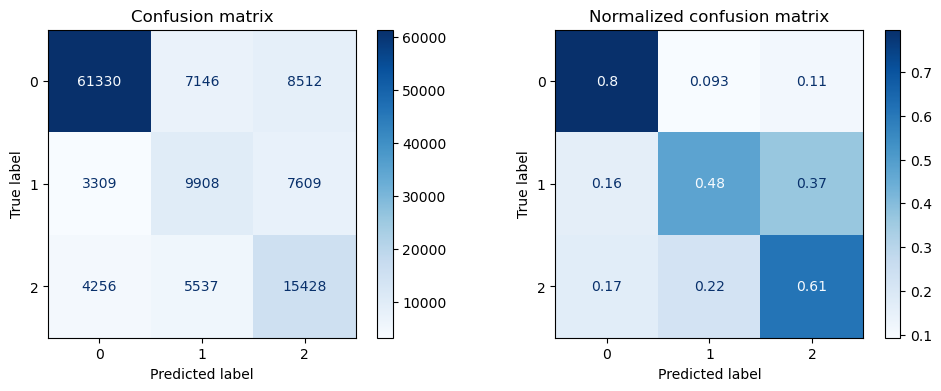

In [47]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

##### 8) Ensemble - XGBClassifier(Boosting)
- eval_set 파라미터에 전달하기 위한 검증 세트를 분리하고 진행합니다.

In [48]:
from sklearn.model_selection import train_test_split

X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)
evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [49]:
from xgboost import XGBClassifier

xgb_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, param_grid=xgb_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:0.74324	validation_1-mlogloss:0.73994
[1]	validation_0-mlogloss:0.69630	validation_1-mlogloss:0.69237
[2]	validation_0-mlogloss:0.67910	validation_1-mlogloss:0.67488
[3]	validation_0-mlogloss:0.67332	validation_1-mlogloss:0.66896
[4]	validation_0-mlogloss:0.65648	validation_1-mlogloss:0.65270
[5]	validation_0-mlogloss:0.65593	validation_1-mlogloss:0.65180
[6]	validation_0-mlogloss:0.64686	validation_1-mlogloss:0.64281
[7]	validation_0-mlogloss:0.64313	validation_1-mlogloss:0.63934
[8]	validation_0-mlogloss:0.64071	validation_1-mlogloss:0.63700
[9]	validation_0-mlogloss:0.63872	validation_1-mlogloss:0.63509
[10]	validation_0-mlogloss:0.63678	validation_1-mlogloss:0.63308
[11]	validation_0-mlogloss:0.63471	validation_1-mlogloss:0.63102
[12]	validation_0-mlogloss:0.63348	validation_1-mlogloss:0.62977
[13]	validation_0-mlogloss:0.63144	validation_1-mlogloss:0.62772
[14]	validation_0-mlogloss:0.62992	validation_1-mlogloss:0.62621
[15]	validation_0-mlogloss:0.62911	

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [50]:
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(xgb_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.674127,12
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.682238,10
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.706499,4
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.680499,11
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.688634,7
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.718074,3
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.683765,9
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.691724,6
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.724233,2
9,"{'learning_rate': 1, 'n_estimators': 50}",0.684813,8


In [51]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)

- 오차행렬을 시각화해봅니다.

오차 행렬
[[64864  5616  6508]
 [ 6575  7775  6476]
 [ 7481  5632 12108]]
정확도: 0.6888, 정밀도: 0.5711, 재현율: 0.5653, F1: 0.5679
################################################################################


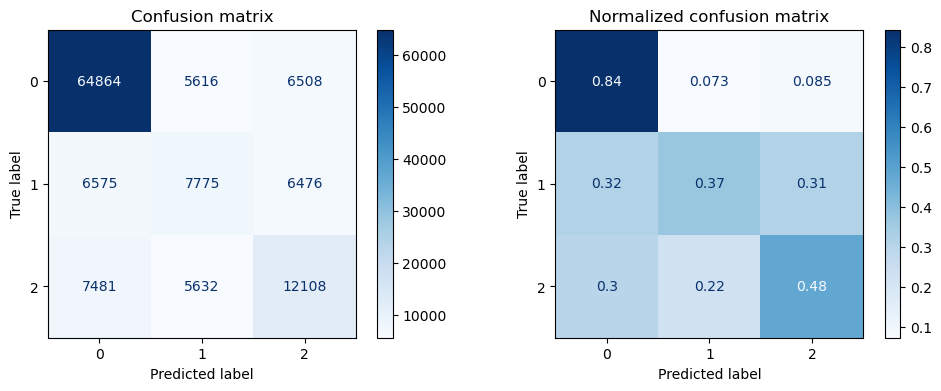

In [52]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

##### 9) Ensemble - LGBMClassifier(Boosting)
- 마찬가지로 검증 세트가 필요하므로 위에서 분리한 검증 세트를 사용합니다.

In [53]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgbm_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=lgbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056602 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4588
[LightGBM] [Info] Number of data points in the train set: 923847, number of used features: 20
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [54]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(lgbm_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.657621,10
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.661246,6
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.685119,3
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.657831,9
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.663509,5
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.694898,2
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.658531,8
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.665667,4
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.697420,1
9,"{'learning_rate': 1, 'n_estimators': 50}",0.657285,11


In [55]:
lgbm = g_lgbm.best_estimator_
lgbm_prediction = lgbm.predict(X_test)

- 오차행렬을 시각화합니다.

오차 행렬
[[64483  5810  6695]
 [ 6292  7977  6557]
 [ 7166  5614 12441]]
정확도: 0.6901, 정밀도: 0.5742, 재현율: 0.5713, F1: 0.5726
################################################################################


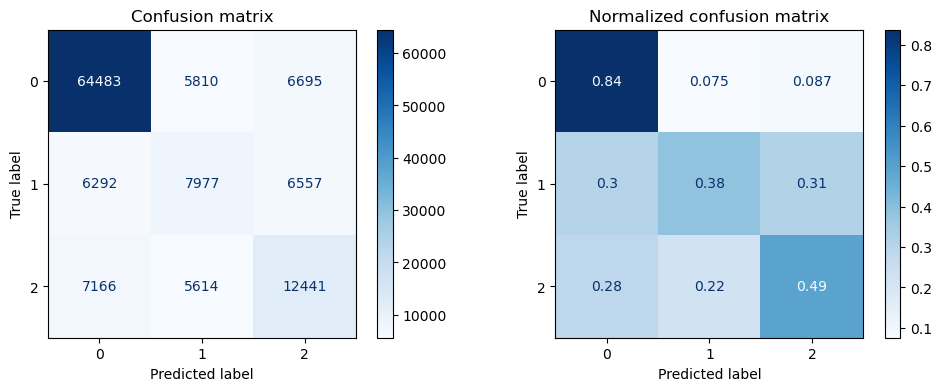

In [56]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

---
#### 4. 정확도 및 F1 Score 비교 시각화
- DTC, LinearSVC, KNN, RFC 의 정확도 및 F1 Score를 시각화하여 비교합니다.
- Hard/Soft Voting의 각 정확도 및 F1 Score를 시각화하여 비교합니다.
- AdaBoost, GBC, XGBoost, LightGBM의 각 정확도 및 F1 Score를 시각화하여 비교합니다.

##### 1) DTC, LinearSVC, KNN, RFC 의 정확도 및 F1 Score

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dtc_accuracy = accuracy_score(y_test, dtc_prediction)
svc_accuracy = accuracy_score(y_test, svc_prediction)
knn_accuracy = accuracy_score(y_test, knn_prediction)
rfc_accuracy = accuracy_score(y_test, rfc_prediction)

dtc_precision = precision_score(y_test, dtc_prediction, average='macro')
svc_precision = precision_score(y_test, svc_prediction, average='macro')
knn_precision = precision_score(y_test, knn_prediction, average='macro')
rfc_precision = precision_score(y_test, rfc_prediction, average='macro')

dtc_recall = recall_score(y_test, dtc_prediction, average='macro')
svc_recall = recall_score(y_test, svc_prediction, average='macro')
knn_recall = recall_score(y_test, knn_prediction, average='macro')
rfc_recall = recall_score(y_test, rfc_prediction, average='macro')

dtc_f1 = f1_score(y_test, dtc_prediction, average='macro')
svc_f1 = f1_score(y_test, svc_prediction, average='macro')
knn_f1 = f1_score(y_test, knn_prediction, average='macro')
rfc_f1 = f1_score(y_test, rfc_prediction, average='macro')

models = ['DTC', 'SVC', 'KNN', 'RFC']
accuracy_scores = [dtc_accuracy, svc_accuracy, knn_accuracy, rfc_accuracy]
precisions = [dtc_precision, svc_precision, knn_precision, rfc_precision]
recalls = [dtc_recall, svc_recall, knn_recall, rfc_recall]
f1_scores = [dtc_f1, svc_f1, knn_f1, rfc_f1]

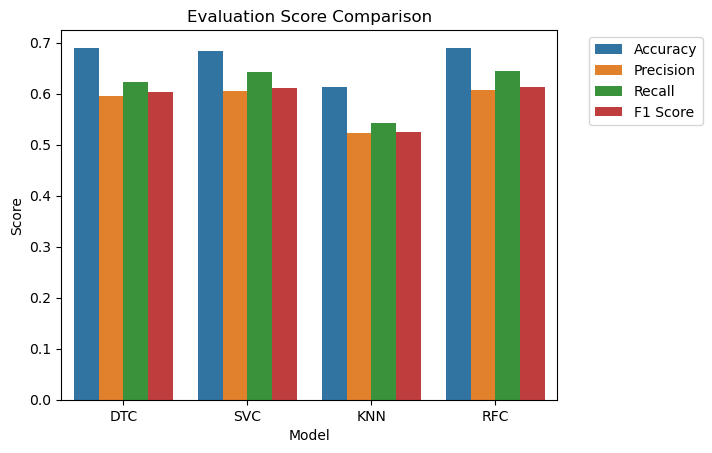

In [120]:
data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Model', y='Score', hue='Metric')

plt.title('Evaluation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

In [121]:
for i in range(4):
    print(f'{models[i]}의 정확도: {round(accuracy_scores[i] * 100, 4)}%, 정밀도: {round(precisions[i] * 100, 4)}%, 재현율: {round(recalls[i] * 100, 4)}%, F1 Score: {round(f1_scores[i] * 100, 4)}%')

DTC의 정확도: 69.0048%, 정밀도: 59.5682%, 재현율: 62.3177%, F1 Score: 60.3297%
SVC의 정확도: 68.3123%, 정밀도: 60.4607%, 재현율: 64.3171%, F1 Score: 61.0566%
KNN의 정확도: 61.3078%, 정밀도: 52.261%, 재현율: 54.1908%, F1 Score: 52.4002%
RFC의 정확도: 68.8723%, 정밀도: 60.7058%, 재현율: 64.3637%, F1 Score: 61.3845%


##### 2) Hard/Soft Voting Classifier의 정확도 및 F1 Score

In [122]:
hard_accuracy = accuracy_score(y_test, hard_vc_prediction)
soft_accuracy = accuracy_score(y_test, soft_vc_prediction)

hard_precision = precision_score(y_test, hard_vc_prediction, average='macro')
soft_precision = precision_score(y_test, soft_vc_prediction, average='macro')

hard_recall = recall_score(y_test, hard_vc_prediction, average='macro')
soft_recall = recall_score(y_test, soft_vc_prediction, average='macro')

hard_f1 = f1_score(y_test, hard_vc_prediction, average='macro')
soft_f1 = f1_score(y_test, soft_vc_prediction, average='macro')

models = ['Hard Voting', 'Soft Voting']
accuracy_scores = [hard_accuracy, soft_accuracy]
precisions = [hard_precision, soft_precision]
recalls = [hard_recall, soft_recall]
f1_scores = [hard_f1, soft_f1]

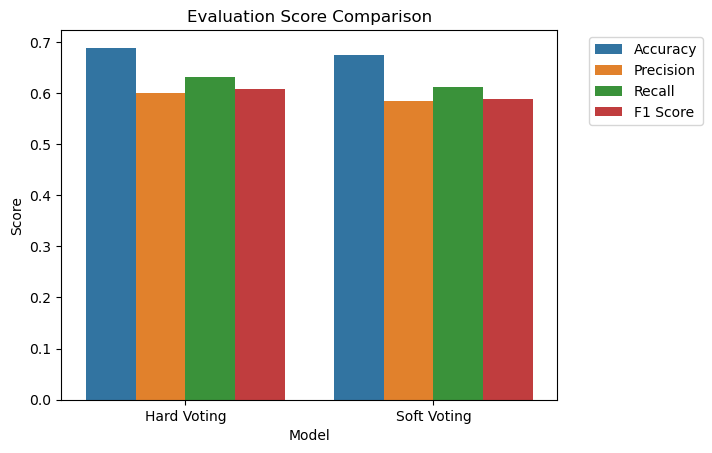

In [123]:
data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Model', y='Score', hue='Metric')

plt.title('Evaluation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

In [124]:
for i in range(2):
    print(f'{models[i]}의 정확도: {round(accuracy_scores[i] * 100, 4)}%, 정밀도: {round(precisions[i] * 100, 4)}%, 재현율: {round(recalls[i] * 100, 4)}%, F1 Score: {round(f1_scores[i] * 100, 4)}%')

Hard Voting의 정확도: 68.8641%, 정밀도: 59.9334%, 재현율: 63.1204%, F1 Score: 60.7836%
Soft Voting의 정확도: 67.3955%, 정밀도: 58.3677%, 재현율: 61.2599%, F1 Score: 58.9003%


##### 3) AdaBoost, GBC, XGBoost, LightGBM의 정확도 및 F1 Score

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
ada_accuracy = accuracy_score(y_test, ada_prediction)
gbc_accuracy = accuracy_score(y_test, gbc_prediction)
xgb_accuracy = accuracy_score(y_test, xgb_prediction)
lgbm_accuracy = accuracy_score(y_test, lgbm_prediction)

ada_precision = precision_score(y_test, ada_prediction, average='macro')
gbc_precision = precision_score(y_test, gbc_prediction, average='macro')
xgb_precision = precision_score(y_test, xgb_prediction, average='macro')
lgbm_precision = precision_score(y_test, lgbm_prediction, average='macro')

ada_recall = recall_score(y_test, ada_prediction, average='macro')
gbc_recall = recall_score(y_test, gbc_prediction, average='macro')
xgb_recall = recall_score(y_test, xgb_prediction, average='macro')
lgbm_recall = recall_score(y_test, lgbm_prediction, average='macro')

ada_f1 = f1_score(y_test, ada_prediction, average='macro')
gbc_f1 = f1_score(y_test, gbc_prediction, average='macro')
xgb_f1 = f1_score(y_test, xgb_prediction, average='macro')
lgbm_f1 = f1_score(y_test, lgbm_prediction, average='macro')

models = ['AdaBoost', 'GBC', 'XGBoost', 'LightGBM']
accuracy_scores = [ada_accuracy, gbc_accuracy, xgb_accuracy, lgbm_accuracy]
precisions = [ada_precision, gbc_precision, xgb_precision, lgbm_precision]
recalls = [ada_recall, gbc_recall, xgb_recall, lgbm_recall]
f1_scores = [ada_f1, gbc_f1, xgb_f1, lgbm_f1]

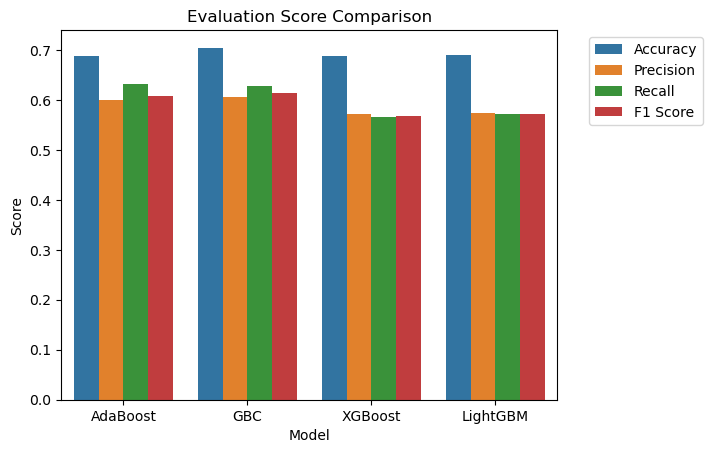

In [60]:
data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Model', y='Score', hue='Metric')

plt.title('Evaluation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

In [61]:
for i in range(4):
    print(f'{models[i]}의 정확도: {round(accuracy_scores[i] * 100, 4)}%, 정밀도: {round(precisions[i] * 100, 4)}%, 재현율: {round(recalls[i] * 100, 4)}%, F1 Score: {round(f1_scores[i] * 100, 4)}%')

AdaBoost의 정확도: 68.8398%, 정밀도: 59.9996%, 재현율: 63.2688%, F1 Score: 60.765%
GBC의 정확도: 70.4401%, 정밀도: 60.5931%, 재현율: 62.8027%, F1 Score: 61.3583%
XGBoost의 정확도: 68.8804%, 정밀도: 57.1052%, 재현율: 56.5309%, F1 Score: 56.787%
LightGBM의 정확도: 69.0056%, 정밀도: 57.4238%, 재현율: 57.1294%, F1 Score: 57.2575%


---
### 📌모델에 따른 평가 지표 점수 (Cycle 1)

<img src="./images/smoke_scores01.png" width="500px"><img src="./images/smoke_scores02.png" width="500px"><img src="./images/smoke_scores03.png" width="500px">

- DTC의 정확도: 69.0048%, 정밀도: 59.5682%, 재현율: 62.3177%, F1 Score: 60.3297%  
- SVC의 정확도: 68.3123%, 정밀도: 60.4607%, 재현율: 64.3171%, F1 Score: 61.0566%  
- KNN의 정확도: 61.3078%, 정밀도: 52.261%, 재현율: 54.1908%, F1 Score: 52.4002%  
- RFC의 정확도: 68.8723%, 정밀도: 60.7058%, 재현율: 64.3637%, F1 Score: 61.3845%   
- Hard Voting의 정확도: 68.8641%, 정밀도: 59.9334%, 재현율: 63.1204%, F1 Score: 60.7836%  
- Soft Voting의 정확도: 67.3955%, 정밀도: 58.3677%, 재현율: 61.2599%, F1 Score: 58.9003%  
- AdaBoost의 정확도: 68.8398%, 정밀도: 59.9996%, 재현율: 63.2688%, F1 Score: 60.765%  
- **GBC의 정확도: 70.4401%, 정밀도: 60.5931%, 재현율: 62.8027%, F1 Score: 61.3583%**  
- XGBoost의 정확도: 68.8804%, 정밀도: 57.1052%, 재현율: 56.5309%, F1 Score: 56.787%  
- LightGBM의 정확도: 69.0056%, 정밀도: 57.4238%, 재현율: 57.1294%, F1 Score: 57.2575%  

### 🎈Gradient Boosting Classifier(GBC) 모델로 훈련했을 때 가장 높은 성능을 보였습니다.

- 따라서 추가적인 데이터 전처리 후, GBC 모델로 다시 한 번 훈련을 수행해봅니다.

- 타겟 데이터의 비중 차이가 꽤 크므로 SMOTE로 oversampling하는 대신, undersampling을 진행합니다.
- 타겟과의 상관관계가 낮으며 분포가 치우쳐 있는 feature들을 제거 후 진행합니다.

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'waistline'}>],
       [<Axes: title={'center': 'sight_left'}>,
        <Axes: title={'center': 'sight_right'}>,
        <Axes: title={'center': 'hear_left'}>,
        <Axes: title={'center': 'hear_right'}>,
        <Axes: title={'center': 'SBP'}>],
       [<Axes: title={'center': 'DBP'}>,
        <Axes: title={'center': 'BLDS'}>,
        <Axes: title={'center': 'tot_chole'}>,
        <Axes: title={'center': 'HDL_chole'}>,
        <Axes: title={'center': 'LDL_chole'}>],
       [<Axes: title={'center': 'triglyceride'}>,
        <Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'urine_protein'}>,
        <Axes: title={'center': 'serum_creatinine'}>,
        <Axes: title={'center': 'SGOT_AST'}>],
       [<Axes: title={'center': 'SGOT_ALT'}>,
        <Axes: title={'center': 'ga

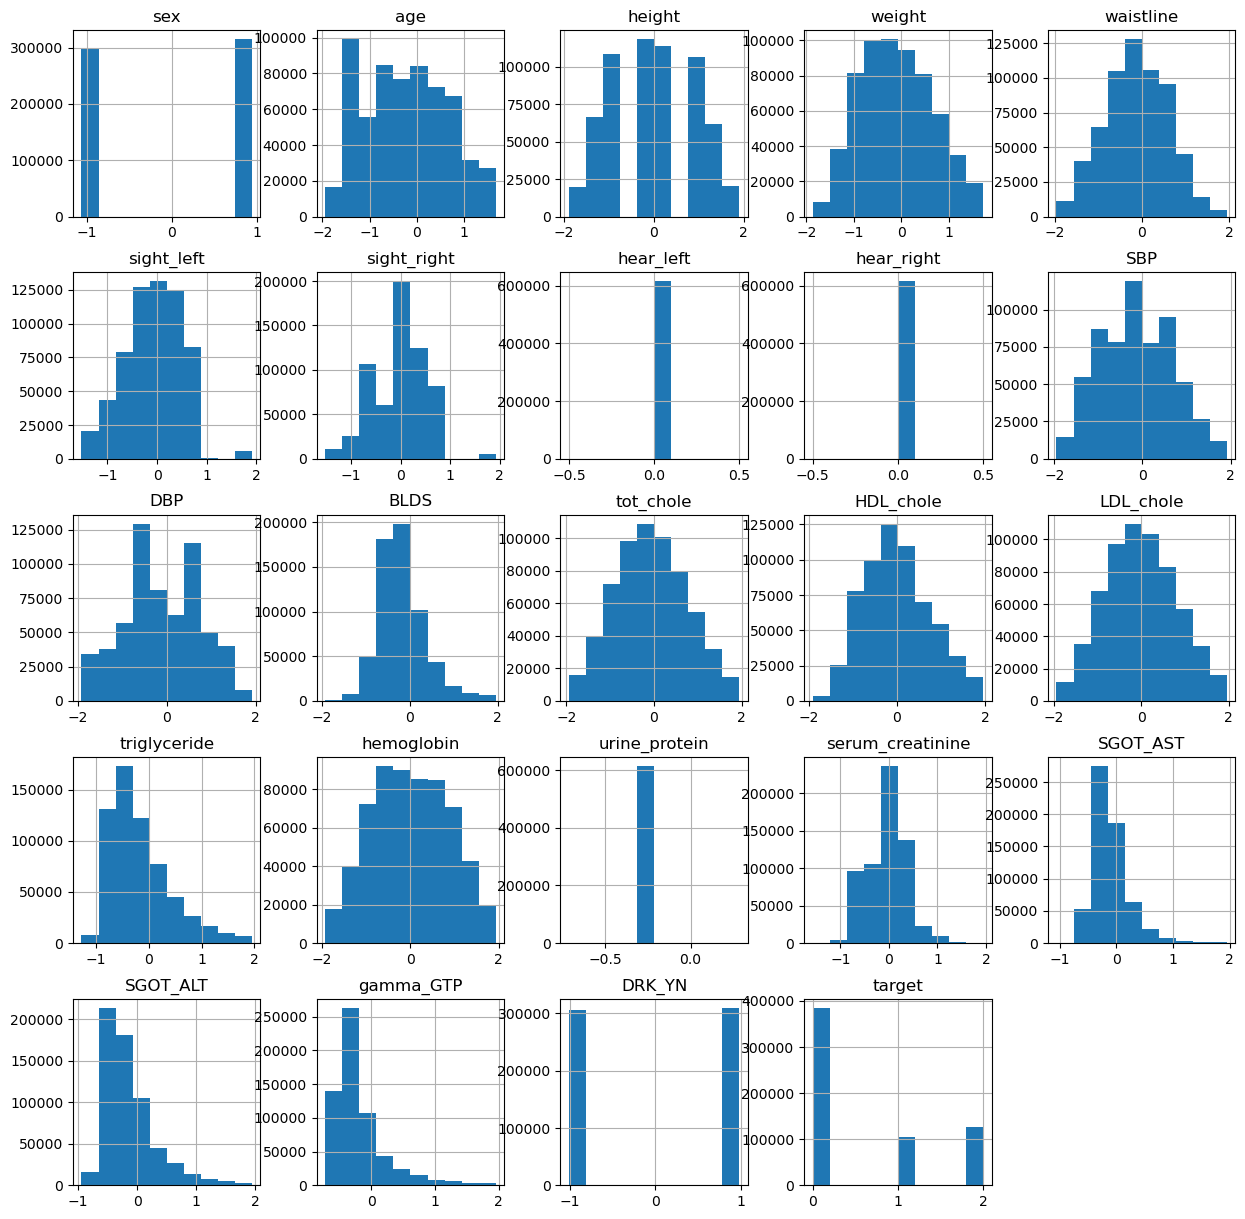

In [52]:
std_s_df.hist(figsize=(15, 15))

In [54]:
corr = std_s_df.corr()
corr['target'].sort_values(ascending=False)[1:]

sex                 0.587789
hemoglobin          0.466574
height              0.458513
weight              0.352726
serum_creatinine    0.336171
DRK_YN              0.327756
gamma_GTP           0.314557
waistline           0.243480
triglyceride        0.201026
SGOT_ALT            0.169615
DBP                 0.102784
sight_right         0.102358
sight_left          0.101251
SBP                 0.080773
BLDS                0.077353
SGOT_AST            0.074531
LDL_chole          -0.004851
tot_chole          -0.007858
age                -0.088418
HDL_chole          -0.185903
hear_left                NaN
hear_right               NaN
urine_protein            NaN
Name: target, dtype: float64

- hear_left, hear_right, urine_protein feature를 제거합니다.

In [53]:
pre_std_s_df = std_s_df.drop(labels=['hear_left', 'hear_right', 'urine_protein'], axis=1)
pre_std_s_df

,sex,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN,target
0,0.939766,-0.858695,0.819896,0.921840,0.740506,0.022423,0.026775,-0.153959,0.401100,-0.049088,...,-0.522404,0.359742,-0.390222,1.801992,0.291310,-0.208085,0.349761,0.057998,0.986039,0
1,0.939766,-1.219295,1.903049,1.319942,0.656947,-0.149160,0.370644,0.536980,0.603288,0.242502,...,-0.118756,0.975639,-0.107881,0.981822,0.084845,-0.250366,0.387791,-0.201485,-1.014159,2
2,0.939766,-0.498096,0.278320,0.921840,0.824064,0.365590,0.886446,-0.153959,-0.609841,-0.090744,...,-0.926053,-1.096014,-0.273391,0.981822,0.084845,0.891211,0.235670,0.616884,-1.014159,0
3,0.939766,0.223104,0.278320,-0.272467,-0.095079,0.022423,0.370644,1.089730,0.603288,0.034223,...,0.227229,0.107784,-0.273391,-0.279978,-0.121620,-0.292646,-0.524934,-0.241406,-1.014159,0
4,-1.064095,-0.137496,-1.346409,-0.670570,-1.014222,-0.835494,-1.004831,-1.466742,-1.822970,-0.465645,...,0.515549,0.051794,-0.555732,-1.226329,-0.121620,-0.292646,-0.524934,-0.500888,-1.014159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615169,-1.064095,0.223104,-1.346409,-1.068672,-0.713411,0.022423,0.026775,-0.430334,-0.205465,0.325814,...,-0.522404,-0.228159,-0.068938,0.603282,-0.121620,0.087879,0.007489,-0.161565,-1.014159,0
615170,0.939766,-0.137496,1.361473,1.319942,0.915979,0.880340,0.886446,-0.568522,0.401100,-0.507301,...,-0.637732,0.331747,-0.000786,0.477102,0.291310,0.003318,0.387791,-0.201485,-1.014159,0
615171,0.939766,-0.858695,0.819896,0.921840,0.406272,0.022423,0.886446,-0.223053,0.704382,-0.715580,...,-0.983717,-0.816061,-0.847809,0.981822,0.497776,-0.504049,-0.334783,-0.441008,-1.014159,0
615172,0.939766,-1.579895,1.361473,-0.272467,-0.763546,0.880340,0.026775,-0.223053,-0.205465,-1.298760,...,-1.099045,-1.124009,-0.769922,0.161652,-0.121620,-0.208085,-0.448873,-0.401087,-1.014159,0


- target 데이터를 기준으로 undersampling을 진행합니다.

In [55]:
pre_std_s_df['target'].value_counts()

target
0    384937
2    126105
1    104132
Name: count, dtype: int64

In [59]:
sample_size = pre_std_s_df.loc[pre_std_s_df['target'] == 1].shape[0]

sampled_zeros = pre_std_s_df[pre_std_s_df['target'] == 0].sample(n=sample_size, random_state=124)
sampled_twos = pre_std_s_df[pre_std_s_df['target'] == 2].sample(n=sample_size, random_state=124)
ones = pre_std_s_df[pre_std_s_df['target'] == 1]
sampled_df = pd.concat([sampled_zeros, sampled_twos, ones])
sampled_df

,sex,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN,target
419589,-1.064095,1.665503,-1.346409,-1.466775,-0.763546,-0.492327,-0.832896,0.536980,-0.104371,-0.507301,...,-0.407076,-0.200164,-0.361014,-1.731049,-0.534550,-0.292646,-0.410843,-0.421048,-1.014159,0
56200,-1.064095,-1.219295,0.278320,1.718045,0.448051,0.022423,-0.317094,-0.292147,-1.216406,-0.382334,...,-0.868389,-0.004197,-0.789394,-0.153798,-0.328085,-0.123524,0.197640,-0.201485,0.986039,0
164906,0.939766,0.944303,-0.804833,-0.272467,-0.095079,-0.492327,0.886446,0.191510,0.401100,0.075879,...,-1.099045,0.779672,-0.273391,-0.153798,0.084845,-0.123524,-0.030541,0.297520,-1.014159,0
197486,-1.064095,0.944303,-0.804833,-0.272467,-0.262196,-0.492327,0.026775,-0.153959,1.209852,-0.423990,...,1.207518,0.023798,-1.061999,-0.721608,-0.121620,0.130160,-0.182662,-0.401087,-1.014159,0
300166,-1.064095,-0.137496,-0.263256,-0.670570,-0.847105,0.022423,-0.317094,0.536980,0.401100,0.075879,...,0.054236,-0.396131,-0.692035,-0.721608,0.084845,-0.165804,-0.486903,-0.540809,-1.014159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615140,0.939766,-1.219295,1.361473,0.921840,-0.838749,0.022423,0.026775,0.260604,0.603288,0.159191,...,-1.041381,-0.424126,-0.341543,-0.027618,0.084845,-0.461769,-0.486903,-0.560769,0.986039,1
615150,0.939766,-1.219295,0.819896,0.523737,-0.095079,0.022423,-0.660962,-0.292147,0.300005,0.200846,...,-0.176420,1.059625,-0.068938,0.855642,-0.121620,0.003318,0.197640,1.016088,0.986039,1
615156,0.939766,-0.498096,0.819896,0.125635,0.155597,0.365590,0.886446,-0.084865,1.310946,-0.965514,...,-0.407076,0.107784,-0.283127,0.414012,-0.121620,-0.081243,-0.144632,-0.361167,0.986039,1
615165,-1.064095,0.944303,-1.346409,0.125635,0.155597,-0.492327,-0.317094,-0.015771,-0.205465,-0.465645,...,1.322846,1.115615,-0.312335,-0.721608,-0.534550,0.130160,-0.106601,-0.341207,0.986039,1


In [60]:
sampled_df.reset_index(drop=True, inplace=True)
sampled_df

,sex,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN,target
0,-1.064095,1.665503,-1.346409,-1.466775,-0.763546,-0.492327,-0.832896,0.536980,-0.104371,-0.507301,...,-0.407076,-0.200164,-0.361014,-1.731049,-0.534550,-0.292646,-0.410843,-0.421048,-1.014159,0
1,-1.064095,-1.219295,0.278320,1.718045,0.448051,0.022423,-0.317094,-0.292147,-1.216406,-0.382334,...,-0.868389,-0.004197,-0.789394,-0.153798,-0.328085,-0.123524,0.197640,-0.201485,0.986039,0
2,0.939766,0.944303,-0.804833,-0.272467,-0.095079,-0.492327,0.886446,0.191510,0.401100,0.075879,...,-1.099045,0.779672,-0.273391,-0.153798,0.084845,-0.123524,-0.030541,0.297520,-1.014159,0
3,-1.064095,0.944303,-0.804833,-0.272467,-0.262196,-0.492327,0.026775,-0.153959,1.209852,-0.423990,...,1.207518,0.023798,-1.061999,-0.721608,-0.121620,0.130160,-0.182662,-0.401087,-1.014159,0
4,-1.064095,-0.137496,-0.263256,-0.670570,-0.847105,0.022423,-0.317094,0.536980,0.401100,0.075879,...,0.054236,-0.396131,-0.692035,-0.721608,0.084845,-0.165804,-0.486903,-0.540809,-1.014159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312391,0.939766,-1.219295,1.361473,0.921840,-0.838749,0.022423,0.026775,0.260604,0.603288,0.159191,...,-1.041381,-0.424126,-0.341543,-0.027618,0.084845,-0.461769,-0.486903,-0.560769,0.986039,1
312392,0.939766,-1.219295,0.819896,0.523737,-0.095079,0.022423,-0.660962,-0.292147,0.300005,0.200846,...,-0.176420,1.059625,-0.068938,0.855642,-0.121620,0.003318,0.197640,1.016088,0.986039,1
312393,0.939766,-0.498096,0.819896,0.125635,0.155597,0.365590,0.886446,-0.084865,1.310946,-0.965514,...,-0.407076,0.107784,-0.283127,0.414012,-0.121620,-0.081243,-0.144632,-0.361167,0.986039,1
312394,-1.064095,0.944303,-1.346409,0.125635,0.155597,-0.492327,-0.317094,-0.015771,-0.205465,-0.465645,...,1.322846,1.115615,-0.312335,-0.721608,-0.534550,0.130160,-0.106601,-0.341207,0.986039,1


In [61]:
sampled_df['target'].value_counts()

target
0    104132
2    104132
1    104132
Name: count, dtype: int64

- 앞서 가장 좋은 성능을 보였던 GBM을 통해 훈련 및 예측을 진행합니다.

In [62]:
from sklearn.model_selection import train_test_split

features, targets = sampled_df.iloc[:, :-1], sampled_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbm_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=gbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [64]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbc_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.647630,2
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.648126,1
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.646409,6
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.647582,3
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.647474,4
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.642764,10
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.646421,5
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.645245,7
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.639443,11
9,"{'learning_rate': 1, 'n_estimators': 50}",0.644661,8


In [65]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

- 오차 행렬을 시각화해봅니다.

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[15400  2823  2604]
 [ 1546 12567  6713]
 [ 1794  6585 12448]]
정확도: 0.6468, 정밀도: 0.6552, 재현율: 0.6468, F1: 0.6501
################################################################################


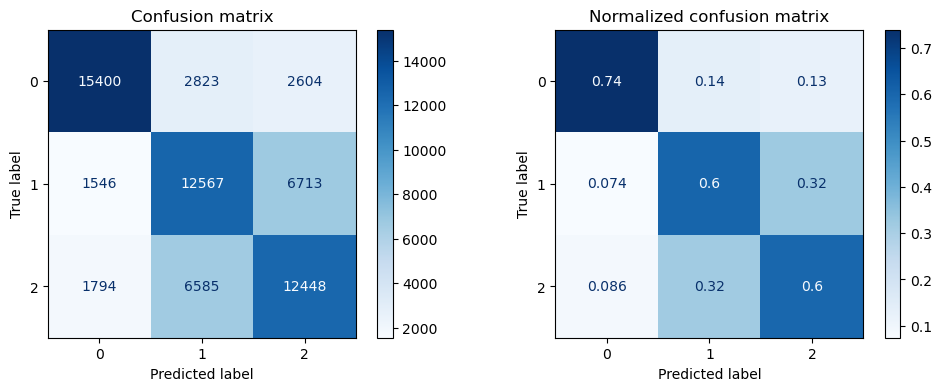

In [67]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gbc_accuracy = accuracy_score(y_test, gbc_prediction)
gbc_precision = precision_score(y_test, gbc_prediction, average='macro')
gbc_recall = recall_score(y_test, gbc_prediction, average='macro')
gbc_f1 = f1_score(y_test, gbc_prediction, average='macro')

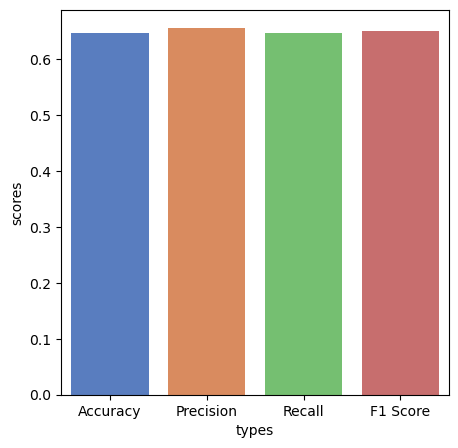

In [72]:
evaluation_scores = [gbc_accuracy, gbc_precision, gbc_recall, gbc_f1]
evaluation_types = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

data = {
    'types': evaluation_types,
    'scores': evaluation_scores
}

df = pd.DataFrame(data)
plt.figure(figsize=(5, 5))
sns.barplot(x='types', y='scores', data=df, palette='muted')
plt.show()

In [73]:
print(f'Undersampling 진행 후 GBM의 정확도: {round(gbc_accuracy * 100, 4)}%, 정밀도: {round(gbc_precision * 100, 4)}%, 재현율: {round(gbc_recall * 100, 4)}%, F1 Score: {round(gbc_f1 * 100, 4)}%')

Undersampling 진행 후 GBM의 정확도: 64.6847%, 정밀도: 65.5192%, 재현율: 64.6846%, F1 Score: 65.006%


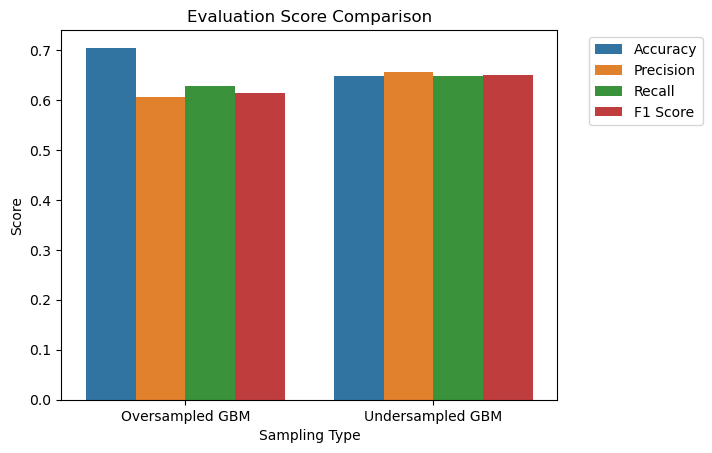

In [74]:
models = ['Oversampled GBM', 'Undersampled GBM']
accuracy_scores = [0.704401, 0.646847]
precisions = [0.605931, 0.655192]
recalls = [0.628027, 0.646846]
f1_scores = [0.613583, 0.65006]

data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Model', y='Score', hue='Metric')

plt.title('Evaluation Score Comparison')
plt.xlabel('Sampling Type')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

---
### 📌샘플링 방식 변경 및 특정 feature 제거 후 평가 지표 분석 (Cycle 2)

<img src="./images/smoke_scores04.png" width="600px">
<img src="./images/smoke_metrix01.png">
<img src="./images/smoke_metrix02.png">

- 오버샘플링 후(Cycle 1) GBM의 정확도: 70.4401%, 정밀도: 60.5931%, 재현율: 62.8027%, F1 Score: 61.3583%, 평균: 63.7986%
- 언더샘플링 및 특정 feature 제거 후(Cycle 2) GBM의 정확도: 64.6847%, 정밀도: 65.5192%, 재현율: 64.6846%, F1 Score: 65.006%, 평균: 64.9736%

### 🎈요약

- 정확도는 기존 Cycle 1 을 진행했을 때 약 6%p 가량 더 높았습니다.
- 하지만, undersampling을 진행한 Cycle 2의 경우 훈련 데이터의 크기가 더 작으므로 시간 및 공간 복잡도를 향상시킬 수 있음과 동시에,  
  정확도를 제외한 다른 평가 지표(정밀도, 재현율, F1 Score)에서 더 높은 점수를 보였습니다.
- 따라서 Cycle 2에서 진행한 방식대로 전처리를 수행한 후 GBM 분류 모델을 사용하는 것이 가장 적합하다고 판단됩니다.